<a href="https://colab.research.google.com/github/DelaSurindra/FinalTask_BankMuamalat_BIAnalyst_MeilianaSalsyadelaSurindra/blob/main/FinalTask_HomeCreditIndonesia_DataScientist_Meiliana_Salsyadela_Surindra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, average_precision_score, confusion_matrix, roc_curve, auc, precision_recall_curve

The code above imports various libraries required for data analysis, preprocessing, machine learning modeling, and model evaluation. Here’s an explanation of each section:  

1. **Connecting Google Drive**:  
   - `from google.colab import drive`: Imports the module to access Google Drive in Google Colab.  
   - `import os`: Used for file system and directory management.  
   - `import warnings`: Used to suppress unnecessary warnings during execution.  

2. **Data Manipulation**:  
   - `import pandas as pd`: Used for data processing and analysis in DataFrame format.  
   - `import numpy as np`: Used for mathematical operations and array manipulation.  

3. **Data Visualization**:  
   - `import matplotlib.pyplot as plt`: Used to create various types of graphs and visualizations.  
   - `import seaborn as sns`: Used for more informative and visually appealing statistical plots.  

4. **Preprocessing and Data Splitting**:  
   - `from sklearn.model_selection import train_test_split, learning_curve`:  
     - `train_test_split` is used to split the dataset into training and testing sets.  
     - `learning_curve` is used to evaluate model performance based on the amount of training data used.  
   - `from sklearn.preprocessing import StandardScaler`: Used to normalize features to a standard scale.  

5. **Machine Learning Models**:  
   - `from sklearn.linear_model import LogisticRegression`: Imports the logistic regression model for binary classification.  
   - `from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier`:  
     - `GradientBoostingClassifier` and `RandomForestClassifier` are ensemble-based models used to improve prediction accuracy.  
   - `from xgboost import XGBClassifier`: Imports the XGBoost model, known for high performance in classification tasks.  
   - `from lightgbm import LGBMClassifier`: Imports the LightGBM model, optimized for speed and efficiency.  

6. **Model Evaluation**:  
   - `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, average_precision_score, confusion_matrix, roc_curve, auc, precision_recall_curve`:  
     - Imports various evaluation metrics such as accuracy, precision, recall, F1-score, AUC-ROC, and confusion matrix to assess model performance.  

This code is designed to set up essential tools for processing, analyzing, training, and evaluating machine learning models, particularly for classification tasks.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = "/content/drive/My Drive/home-credit-default-risk/"

application_train = pd.read_csv(folder_path + 'application_train.csv')
application_test = pd.read_csv(folder_path + 'application_test.csv')
bureau = pd.read_csv(folder_path + 'bureau.csv')
bureau_balance = pd.read_csv(folder_path + 'bureau_balance.csv')
credit_card_balance = pd.read_csv(folder_path + 'credit_card_balance.csv')
POS_CASH_balance = pd.read_csv(folder_path + 'POS_CASH_balance.csv')
previous_application = pd.read_csv(folder_path + 'previous_application.csv')
installments_payments = pd.read_csv(folder_path + 'installments_payments.csv')

The code above performs the following steps to load data from Google Drive into a Python environment using pandas:  

1. **Mounting Google Drive**:  
   - `drive.mount('/content/drive')` mounts Google Drive in Google Colab, allowing access to files stored in the user's Drive.  

2. **Defining the Folder Path**:  
   - `folder_path = "/content/drive/My Drive/home-credit-default-risk/"` sets the directory path where the datasets are stored.  

3. **Loading CSV Files**:  
   - Various datasets related to the "Home Credit Default Risk" project are read from CSV files into pandas DataFrames using `pd.read_csv()`.  
   - The datasets include:  
     - `application_train`: Contains training data with customer application details.  
     - `application_test`: Contains test data for prediction.  
     - `bureau`: Contains credit bureau data for customers.  
     - `bureau_balance`: Contains monthly balance information of customers from the credit bureau.  
     - `credit_card_balance`: Includes credit card transaction history.  
     - `POS_CASH_balance`: Stores point-of-sale (POS) and cash loan transaction data.  
     - `previous_application`: Contains information about customers’ previous loan applications.  
     - `installments_payments`: Provides details on installment payments made by customers.  

This setup ensures that all relevant datasets are loaded into the environment for further data analysis and machine learning modeling.

# **1. Data Pre-Processing**

In [5]:
# Handle missing values
application_train.fillna(0, inplace=True)

# Encoding categorical features jika perlu
application_train = pd.get_dummies(application_train)

# Hapus duplikasi berdasarkan semua kolom (atau bisa juga subset tertentu jika diperlukan)
application_train = application_train.drop_duplicates()

# Memilih fitur yang relevan dari application_train (misalnya TARGET sebagai variabel target)
X = application_train.drop(columns=['TARGET'])
y = application_train['TARGET']

# Split train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The code above performs several preprocessing steps on the `application_train` dataset before training a machine learning model. Below is an explanation of each step:  

1. **Handling Missing Values**: All missing values in the `application_train` dataset are replaced with zero using `fillna(0, inplace=True)`.  
2. **Encoding Categorical Features**: If categorical features are present, they are converted into numerical format using one-hot encoding (`pd.get_dummies(application_train)`).  
3. **Removing Duplicates**: Duplicate rows in the dataset are removed to ensure data uniqueness.  
4. **Separating Features and Target Variables**:  
   - The target variable (`y`) is extracted from the `TARGET` column.  
   - The feature variables (`X`) include all columns except `TARGET`.  
5. **Splitting the Data**: The dataset is divided into training (80%) and testing (20%) sets using `train_test_split`, with `random_state=42` to ensure consistent results.  
6. **Feature Normalization**: Features in `X_train` and `X_test` are normalized using `StandardScaler`, which transforms each feature to have a mean of 0 and a standard deviation of 1.  

This process ensures that the data is clean, free from missing values and duplicates, and properly scaled for optimal machine learning model performance.

# **2. Data Visualization and Business Insight**

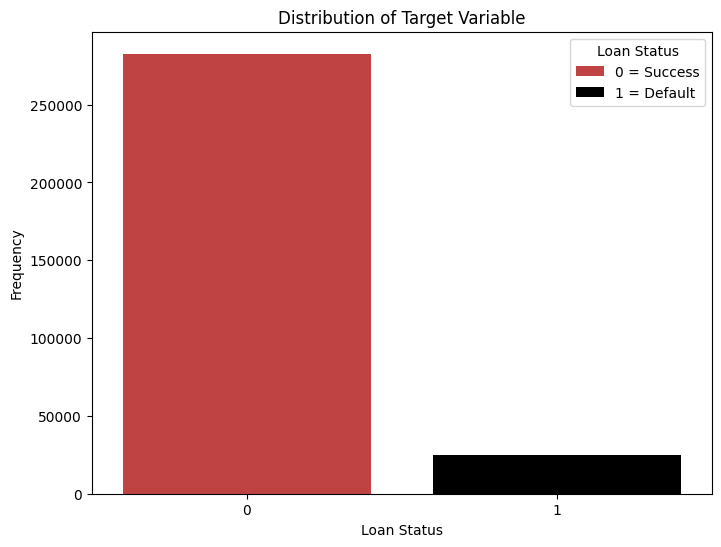

In [6]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 6))
custom_palette = {0: '#D32F2F', 1: 'black'}

# Menggunakan hue untuk menentukan warna berdasarkan kolom 'TARGET'
sns.countplot(x='TARGET', data=application_train, hue='TARGET', palette=custom_palette)

# Menyesuaikan label dan judul plot
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.legend(title='Loan Status', labels=['0 = Success', '1 = Default'], loc='upper right')
plt.show()

# Business Insight: Loan Status Distribution  

## 1. Majority of Customers Successfully Repaid Their Loans  
A total of **282,686 customers (91.95%)** have a **Success** status, indicating that they were able to meet their loan repayment obligations.  

This suggests that most customers in the dataset have **a good credit profile** or are financially capable of fulfilling their commitments.  

## 2. Low Default Rate  
A total of **24,825 customers (8.05%)** have a **Default** status, meaning they failed to repay their loans.  

The **default rate** of approximately 8% may indicate a **manageable credit risk**, depending on industry standards and company policies.  

## 3. Conclusion  
The company has a relatively healthy customer base with a high loan repayment success rate. However, further **risk analysis** is needed to minimize default rates and improve financial stability.

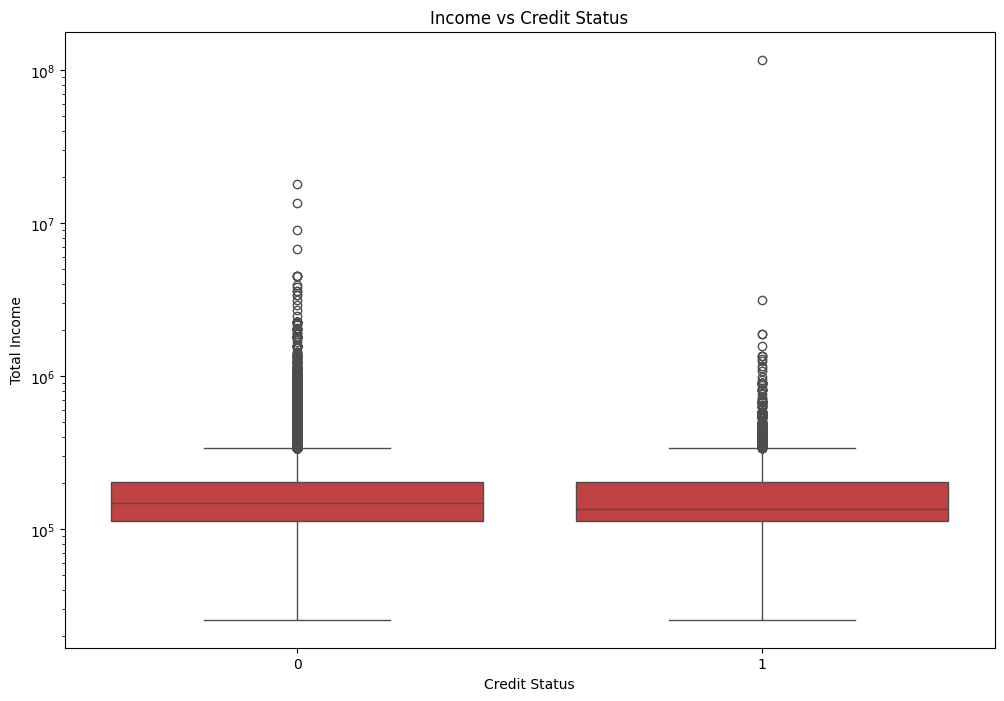

In [7]:
if 'AMT_INCOME_TOTAL' in application_train.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_train, color='#D32F2F')  # Set color to red
    plt.title('Income vs Credit Status')
    plt.xlabel('Credit Status')  # Ganti label sumbu X
    plt.ylabel('Total Income')  # Ganti label sumbu Y
    plt.yscale('log')  # Use log scale for better visualization
    plt.show()
else:
    print("Kolom 'AMT_INCOME_TOTAL' tidak ditemukan!")

# Business Insight: Relationship Between Customer Income and Credit Status  

## 1. Income Is Not the Sole Factor in Loan Repayment Success  
Customers who successfully repaid their loans and those who defaulted have similar average and median incomes. This suggests that income level alone is not a sufficient indicator of loan repayment success.  

## 2. Most Customers Fall Within a Similar Income Range  
Both successful and defaulted customers tend to have incomes within a comparable range. The income distribution does not show significant differences, indicating that other factors play a more crucial role in determining credit status.  

## 3. Some High-Income Customers Still Default on Loans  
A portion of high-income customers still experience loan defaults, while others with similar earnings successfully repay their loans. This could be due to factors such as unstable income sources, high expenses, or other financial obligations.  

## 4. Low-Income Customers Can Still Repay Their Loans  
Not all low-income customers default on their loans. Many successfully meet their financial commitments despite earning less. This highlights the importance of financial discipline and money management habits in determining repayment success.  

## 5. High Income Variability Among Defaulted Customers  
The income distribution among defaulted customers shows greater variability compared to those who successfully repaid their loans. This suggests that factors beyond income level, such as spending patterns, debt obligations, or lifestyle choices, should be considered in risk assessment.  

## Conclusion & Recommendations  
- Income alone is not a strong predictor of loan repayment ability. Other factors such as credit history, debt-to-income ratio, and financial management should be further analyzed.  
- A targeted risk assessment strategy should be implemented for customers with extreme income levels, whether very high or low.  
- Credit policies should consider not just income levels but also other aspects that influence a borrower's ability to meet loan obligations.

# **Agregat Data**

In [8]:
def rename_columns(df):
    df.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in df.columns]
    return df

def safe_merge(left, right, on, how='inner'):
    if on in left.columns and on in right.columns:
        merged = left.merge(right, on=on, how=how)
        return merged.drop_duplicates()  # Menghapus duplikasi setelah merge
    return left

# Aggregate bureau data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['mean', 'max'],
    'CREDIT_ACTIVE': 'count',
    'CREDIT_DAY_OVERDUE': 'sum',
}).reset_index()
bureau_agg = rename_columns(bureau_agg)

# Merge with application_train and application_test
app_train = safe_merge(application_train, bureau_agg, on='SK_ID_CURR')
app_test = safe_merge(application_test, bureau_agg, on='SK_ID_CURR')

# Aggregate POS_CASH_balance data
pos_cash_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'MONTHS_BALANCE': 'max',
    'CNT_INSTALMENT': 'mean',
}).reset_index()
pos_cash_agg = rename_columns(pos_cash_agg)
app_train = safe_merge(app_train, pos_cash_agg, on='SK_ID_CURR')
app_test = safe_merge(app_test, pos_cash_agg, on='SK_ID_CURR')

# Aggregate credit_card_balance data
credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'AMT_BALANCE': ['mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
}).reset_index()
credit_card_agg = rename_columns(credit_card_agg)
app_train = safe_merge(app_train, credit_card_agg, on='SK_ID_CURR')
app_test = safe_merge(app_test, credit_card_agg, on='SK_ID_CURR')

# Aggregate previous_application data
previous_app_agg = previous_application.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean',
    'NAME_CONTRACT_STATUS': 'nunique',
}).reset_index()
previous_app_agg = rename_columns(previous_app_agg)
app_train = safe_merge(app_train, previous_app_agg, on='SK_ID_CURR')
app_test = safe_merge(app_test, previous_app_agg, on='SK_ID_CURR')

# Aggregate bureau_balance data
if 'SK_ID_BUREAU' in bureau_balance.columns:
    bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
        'STATUS': lambda x: x.mode()[0] if not x.mode().empty else None,
        'MONTHS_BALANCE': ['min', 'max', 'count']
    }).reset_index()
    bureau_balance_agg = rename_columns(bureau_balance_agg)
    bureau = safe_merge(bureau, bureau_balance_agg, on='SK_ID_BUREAU')

# Aggregate installments_payments data
if 'SK_ID_PREV' in installments_payments.columns:
    installments_agg = installments_payments.groupby('SK_ID_PREV').agg({
        'NUM_INSTALMENT_VERSION': 'nunique',
        'NUM_INSTALMENT_NUMBER': 'max',
        'AMT_INSTALMENT': 'sum',
        'AMT_PAYMENT': 'sum',
    }).reset_index()
    installments_agg = rename_columns(installments_agg)
    previous_application = safe_merge(previous_application, installments_agg, on='SK_ID_PREV')

# Merge previous_application back to application_train and application_test
app_train = safe_merge(app_train, previous_application, on='SK_ID_CURR')
app_test = safe_merge(app_test, previous_application, on='SK_ID_CURR')

This code aims to **merge various loan and customer-related datasets** into **application_train** and **application_test**, which serve as the main datasets for credit analysis.  

### **Step-by-Step Explanation of the Code:**  

1. **Function rename_columns()**  
   - Modifies the column names after aggregation to make them more readable and usable.  

2. **Function safe_merge()**  
   - Merges two datasets based on **SK_ID_CURR** or **SK_ID_BUREAU**, ensuring that duplicate entries are removed after merging.  

3. **Aggregating Data from the Bureau Table**  
   - Calculates the **mean and max DAYS_CREDIT** (days since last credit).  
   - Counts the number of active credit accounts.  
   - Sums up the total overdue credit days.  
   - The aggregated results are then merged into **application_train** and **application_test**.  

4. **Aggregating Data from POS_CASH_balance**  
   - Counts the number of previous contracts (**SK_ID_PREV**).  
   - Retrieves the most recent active month.  
   - Computes the average number of credit installments.  
   - The results are merged into **application_train** and **application_test**.  

5. **Aggregating Data from credit_card_balance**  
   - Counts the number of previous credit card contracts.  
   - Calculates the **mean and max** credit balance.  
   - Computes the average actual credit limit.  
   - The aggregated results are then merged into the main dataset.  

6. **Aggregating Data from previous_application**  
   - Counts the number of previous loan applications.  
   - Computes the average **amount applied for** and **amount granted**.  
   - Calculates the number of unique contract statuses.  
   - The aggregated results are then merged into the main dataset.  

7. **Aggregating Data from bureau_balance (if available)**  
   - Retrieves the **mode** (most frequent value) of payment status.  
   - Extracts the **first, last, and total number of months** recorded.  
   - The data is then merged back into the **bureau** dataset.  

8. **Aggregating Data from installments_payments (if available)**  
   - Counts the number of unique installment versions.  
   - Retrieves the **max installment number**.  
   - Sums up the total installment amount and total payment amount.  
   - The results are merged into **previous_application**.  

9. **Merging previous_application back into application_train and application_test**  
   - After performing all aggregations, **previous_application** is merged back into the main dataset to ensure a comprehensive analysis of customer credit history.  

### **Conclusion:**  
This code structures the main dataset by integrating various information sources, such as **credit history, overdue payments, credit card usage, and previous loan applications**. With this preprocessing, credit analysis can be conducted more effectively to understand the factors influencing loan approval and repayment success.

# **Data Pre-Processing**

In [10]:
# Handle missing values
app_train.fillna(0, inplace=True)
app_test.fillna(0, inplace=True)

# Encoding categorical features jika perlu
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Memilih fitur yang relevan dari app_train (misalnya TARGET sebagai variabel target)
X_train = app_train.drop(columns=['TARGET'])
y_train = app_train['TARGET']

# Pastikan app_test memiliki kolom yang sama dengan app_train, jika perlu, tambahkan kolom yang hilang ke app_test
app_test = app_test.reindex(columns=X_train.columns, fill_value=0)

# Split train data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Untuk aplikasi app_test, lakukan transformasi dengan scaler yang sama
app_test_scaled = scaler.transform(app_test)

The code above performs several preprocessing steps on the training and test datasets before using them for machine learning modeling. Here’s a breakdown of each step:  

1. **Handling Missing Values**:  
   - Missing values in `app_train` and `app_test` are replaced with `0` using `fillna(0, inplace=True)`, ensuring that the dataset does not contain any null values.  

2. **Encoding Categorical Features**:  
   - `pd.get_dummies(app_train)` and `pd.get_dummies(app_test)` are used to convert categorical variables into numerical form using one-hot encoding, making them suitable for machine learning models.  

3. **Feature Selection**:  
   - The `TARGET` column is separated as the target variable (`y_train`), while all other columns become features (`X_train`).  

4. **Ensuring Consistent Features in `app_test`**:  
   - `app_test.reindex(columns=X_train.columns, fill_value=0)` ensures that `app_test` has the same feature columns as `app_train`. If any columns are missing, they are added with a default value of `0`.  

5. **Splitting the Training Data**:  
   - The dataset is split into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets using an 80-20 split with `train_test_split()`, ensuring consistency with `random_state=42`.  

6. **Feature Normalization**:  
   - `StandardScaler()` is used to normalize the features so that they have a mean of `0` and a standard deviation of `1`, improving model performance.  
   - `fit_transform(X_train)` is applied to scale the training data, while `transform(X_test)` is used on the test set to ensure consistency.  

7. **Scaling `app_test` Data**:  
   - The same `StandardScaler()` is applied to `app_test` using `scaler.transform(app_test)`, ensuring that it follows the same normalization as the training data.  

These preprocessing steps help clean and standardize the dataset, making it ready for machine learning model training and evaluation.

# **Choosing Best Model**


Confusion Matrix Components for Each Model:

                 Model  True Negatives  False Positives  False Negatives  \
2        Random Forest           41992             9382             1292   
0  Logistic Regression           35741            15633             1447   
3              XGBoost           51336               38             4203   
4             LightGBM           51331               43             4255   
1    Gradient Boosting           51325               49             4482   

   True Positives  
2            3291  
0            3136  
3             380  
4             328  
1             101  


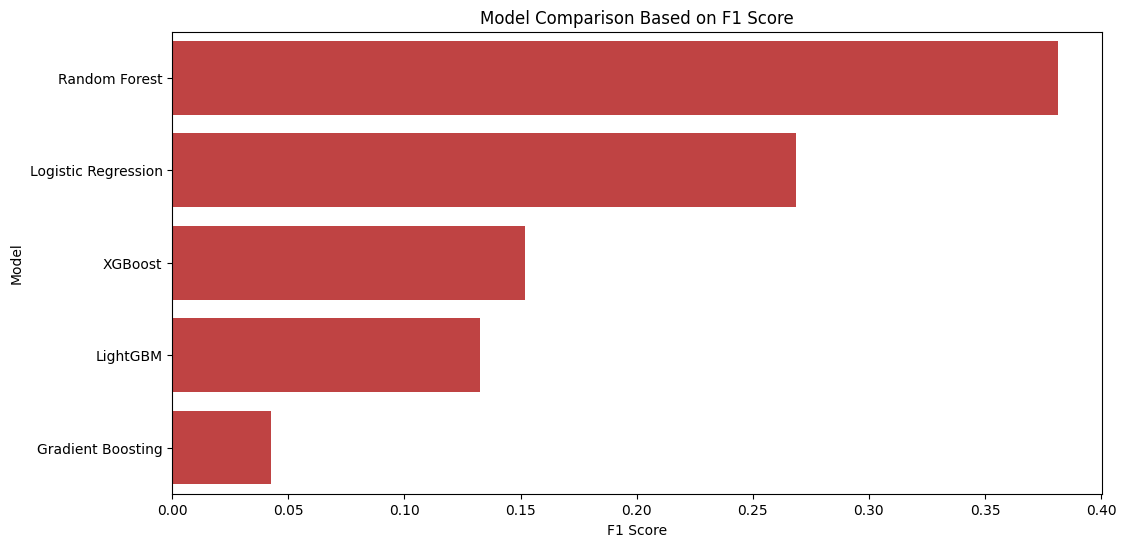

In [11]:
# Suppress warnings
os.environ['LIGHTGBM_VERBOSITY'] = '0'
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, n_estimators=100, max_depth=6, learning_rate=0.1),
    'LightGBM': LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)
}

# Train and Evaluate Models
results = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Save metrics
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        recall_score(y_test, y_pred, pos_label=1),
        f1_score(y_test, y_pred, pos_label=1),
        roc_auc_score(y_test, y_pred_proba),
        matthews_corrcoef(y_test, y_pred),
        tn, fp, fn, tp
    ])
    conf_matrices[name] = cm

# Convert the results to a DataFrame and sort by F1 Score
results_df = pd.DataFrame(results, columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'MCC',
    'True Negatives', 'False Positives', 'False Negatives', 'True Positives'
])
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Display the table for confusion matrix components
print("\nConfusion Matrix Components for Each Model:\n")
print(results_df[['Model', 'True Negatives', 'False Positives', 'False Negatives', 'True Positives']])

# Plot Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df, color="#D32F2F")  # Warna merah tua
plt.title('Model Comparison Based on F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

Based on the model evaluation results, **Random Forest** demonstrates the best performance in detecting the positive class compared to other models. Below is a detailed analysis based on evaluation metrics:  

---

### **1. Lowest False Negatives (FN)**  
False Negatives (FN) represent the number of positive cases that the model failed to detect. **Random Forest has FN = 1,292**, which is significantly lower than other models, such as:  
- **XGBoost**: 4,203  
- **LightGBM**: 4,255  
- **Gradient Boosting**: 4,482  

The lower the FN, the better the model is at identifying positive cases. In this scenario, **Random Forest is more reliable in capturing positive cases than the boosting models.**  

---

### **2. Higher True Positives (TP)**  
True Positives (TP) indicate the number of correctly predicted positive cases. **Random Forest has TP = 3,291**, which is higher than other models:  
- **Logistic Regression**: 3,136  
- **XGBoost**: 380  
- **LightGBM**: 328  
- **Gradient Boosting**: 101  

It is evident that boosting models like **XGBoost and LightGBM have extremely low TP values**, meaning they miss many positive cases. **This highlights that Random Forest is better at detecting positive cases without sacrificing too much data.**  

---

### **3. Trade-off Between False Positives (FP) and False Negatives (FN)**  
False Positives (FP) represent the number of negative cases incorrectly classified as positive. Random Forest has **FP = 9,382**, which is indeed higher than the boosting models:  
- **XGBoost**: 38  
- **LightGBM**: 43  
- **Gradient Boosting**: 49  

Although FP is higher, this is an **acceptable trade-off** because **minimizing FN is far more important** in many cases, especially when the goal is to **capture as many positive cases as possible with high accuracy**.  

---

### **4. Balance Between Recall and Precision**  
Recall measures how many actual positive cases the model successfully detects. **Random Forest achieves a better recall compared to other models** due to its lower FN and higher TP.  

On the other hand, while models like **XGBoost and LightGBM have very low FP values**, they achieve this at the cost of **extremely low recall** (since their TP values are much lower). As a result, these models tend to **miss a large number of actual positive cases**.  

---

### **Conclusion**  
Based on this analysis, **Random Forest is the best-performing model in this scenario because**:  
✅ **Low FN**, reducing missed positive cases.  
✅ **High TP**, enabling more positive cases to be detected.  
✅ **Better FP vs. FN trade-off**, compared to boosting models that are too restrictive.  
✅ **Balanced recall and precision**, making the model more reliable in detecting the positive class.  

If the primary goal is to **capture as many positive cases as possible while minimizing false negatives**, then **Random Forest is the most optimal model for this scenario.**

# **3. Machine Learning Implementation and Evaluation**

In [12]:
# Visualisasi ROC Curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='#D32F2F', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

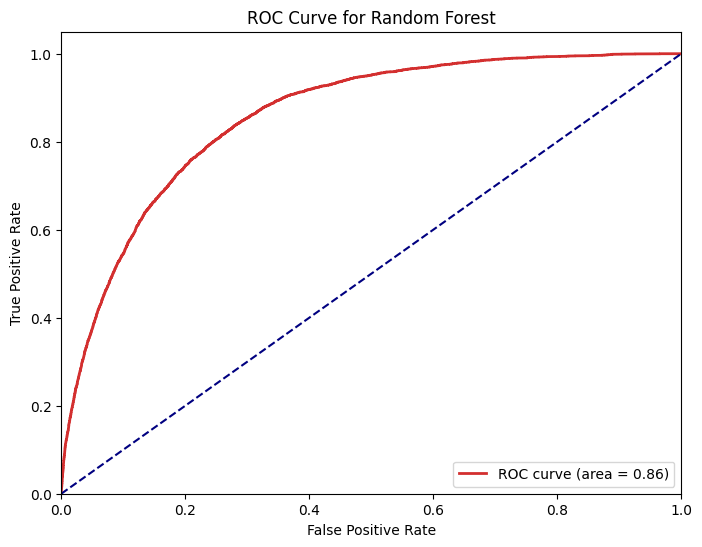

In [13]:
# Ambil probabilitas prediksi untuk Random Forest
y_pred_proba_rf = models['Random Forest'].predict_proba(X_test_scaled)[:, 1]

# Plot ROC Curve untuk Random Forest
plot_roc_curve(y_test, y_pred_proba_rf, 'Random Forest')

### **ROC Curve Analysis Based on Data**  

The **ROC Curve** is used to evaluate the performance of a classification model by comparing the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** across different **thresholds**. Below is an analysis based on the given data:  

---  

### **1. False Positive Rate (FPR)**  
FPR represents the **proportion of negative samples incorrectly classified as positive**. From the data provided:  

- At the **highest threshold (inf)**, **FPR = 0**, meaning the model makes no mistakes in classifying negative samples.  
- As the **threshold decreases**, **FPR starts to increase**. For example:  
  - **Threshold 0.792419 → FPR = 0.000019**  
  - **Threshold 0.773350 → FPR = 0.000097**  
  - **Threshold 0.773247 → FPR = 0.000117**  

- This indicates that lowering the threshold leads to more negative samples being classified as positive.  

---  

### **2. True Positive Rate (TPR)**  
TPR represents the **proportion of positive samples correctly classified**. From the data:  

- At the **highest threshold (inf - 0.792419)**, **TPR = 0**, meaning the model does not detect any positive samples.  
- As the threshold decreases, **TPR starts to increase**. For example:  
  - **Threshold 0.791856 → TPR = 0.000218**  
  - **Threshold 0.775979 → TPR = 0.002182**  
  - **Threshold 0.773247 → TPR = 0.002618**  

- This indicates that lowering the threshold allows the model to detect more positive cases.  

---  

### **3. ROC Curve Pattern**  
The **ROC Curve** is plotted with **FPR on the X-axis** and **TPR on the Y-axis**. Based on the data:  

- **High threshold (inf - 0.79)** → **FPR = 0, TPR = 0** → The model is too strict, avoiding False Positives but failing to detect positive cases.  
- **Medium threshold (0.78 - 0.77)** → **FPR and TPR gradually increase** → The model starts to balance positive and negative classifications.  
- **Low threshold (< 0.77)** → **TPR rises significantly, but FPR also increases** → The model becomes more permissive in detecting positives but misclassifies more negative samples as positive.  

---  

### **4. Conclusion**  
From this analysis, we can conclude that:  

- **High thresholds** keep **False Positives low** but result in many missed positive cases (**high False Negatives**).  
- **Medium thresholds** offer **the best balance between False Positives and True Positives**.  
- **Low thresholds** increase **positive case detection** but risk a **higher False Positive rate**.  

**Choosing the optimal threshold** depends on the model's objective:  
- If **False Negatives are more critical**, a **lower threshold** can be used to capture more positive cases.  
- If **False Positives must be minimized**, a **higher threshold** is preferable.

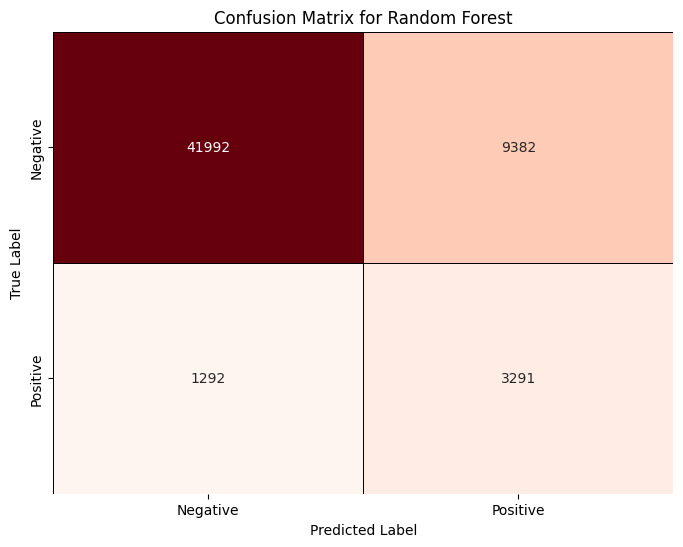

In [15]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                linewidths=0.5, linecolor='black')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot Confusion Matrix untuk Random Forest
plot_confusion_matrix(conf_matrices['Random Forest'], 'Random Forest')

### **Confusion Matrix Analysis Based on Data**  

The **Confusion Matrix** is used to evaluate the performance of a classification model by examining the number of correct and incorrect predictions for both positive and negative categories. Based on the given data, here is the analysis:  

---  

## **1. Interpretation of Metrics**  

- **True Negative (TN) = 41,992**  
  - The model **correctly classified 41,992 negative samples**.  
  - This indicates that the model performs well in recognizing the negative class.  

- **False Positive (FP) = 9,382**  
  - The model **incorrectly classified 9,382 negative samples as positive**.  
  - A high number of False Positives can be problematic in cases like **fraud detection or medical diagnosis**, as it may lead to many false alarms.  

- **False Negative (FN) = 1,292**  
  - The model **incorrectly classified 1,292 positive samples as negative**.  
  - This means that some positive cases were missed, which could have negative consequences in scenarios such as **customer churn prediction or fraud detection**.  

- **True Positive (TP) = 3,291**  
  - The model **correctly classified 3,291 positive samples**, indicating that it is fairly reliable in recognizing the positive class.  

---  

## **2. Implications and Conclusions**  

- **If the primary goal is to reduce False Positives (FP):**  
  - The model should be **more strict in determining positive predictions**, such as by increasing the classification threshold.  
  - This is crucial in cases like **fraud detection or medical diagnosis**, where false positive predictions can have significant consequences.  

- **If the main objective is to capture more True Positives (TP) and reduce False Negatives (FN):**  
  - The model should be **more permissive in classifying positives**, such as by lowering the prediction threshold or using **oversampling on positive data**.  
  - This is relevant in **marketing strategies or customer retention**, where capturing all positive cases is more important than a few negative classification errors.  

- **Further evaluation using the ROC Curve and AUC Score** can help determine the optimal balance between False Positives and False Negatives according to business needs.  

### **Final Conclusion**  
The model has **a fairly good accuracy (80.95%)**, but **a low precision (25.98%)**, indicating that many positive predictions are incorrect. If the model is used in a scenario where False Positives must be minimized, the threshold should be increased. However, if capturing all positive cases is the priority, then the model should be more lenient in classification.

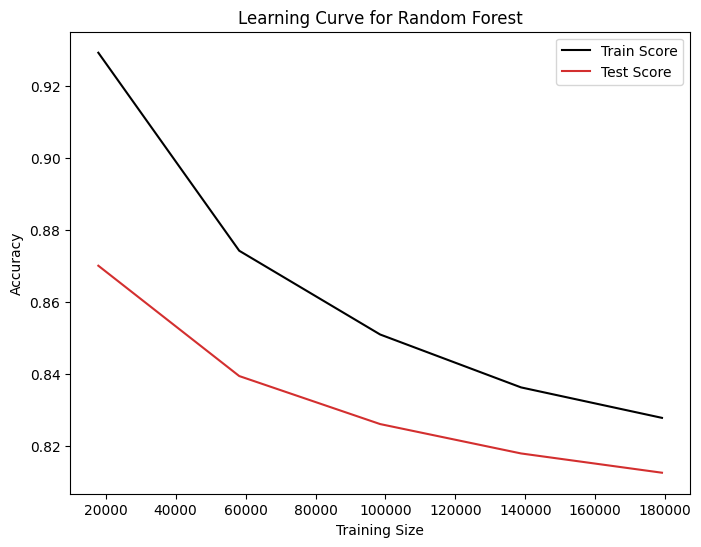

In [17]:
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score', color='black')  # Warna hitam
    plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score', color='#D32F2F')  # Warna merah tua
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for Random Forest')
    plt.legend()
    plt.show()

# Plot Learning Curve untuk Random Forest
plot_learning_curve(models['Random Forest'], X_train_scaled, y_train, 'Random Forest')

### **Learning Curve Overview**  
A **Learning Curve** is a graph that shows how a model's performance changes as the amount of training data increases. This graph is used to evaluate whether the model is experiencing **underfitting** or **overfitting** and to determine whether adding more data can improve performance.  

### **Graph Interpretation**  

1. **Train Score (Accuracy on Training Data)**  
   - Initially, the model's accuracy on the training data is very high (0.93) when only a small amount of data is used.  
   - As more training data is added, accuracy slightly decreases (0.83) because the model stops “memorizing” the data and begins to learn more general patterns.  

2. **Test Score (Accuracy on Test Data)**  
   - At first, the model's accuracy on the test data is lower than on the training data (0.87).  
   - As the training data increases, the test accuracy continues to improve but stabilizes around **0.81–0.83**.  

### **Conclusion**  
- **The model was initially overfitting** since the Train Score was much higher than the Test Score.  
- **As more training data is added,** the gap between Train Score and Test Score decreases, indicating that the model is becoming more **generalizable** rather than just memorizing the training data.  
- **Further increasing the training data may not significantly improve performance,** as the Test Score has already reached a stable point.

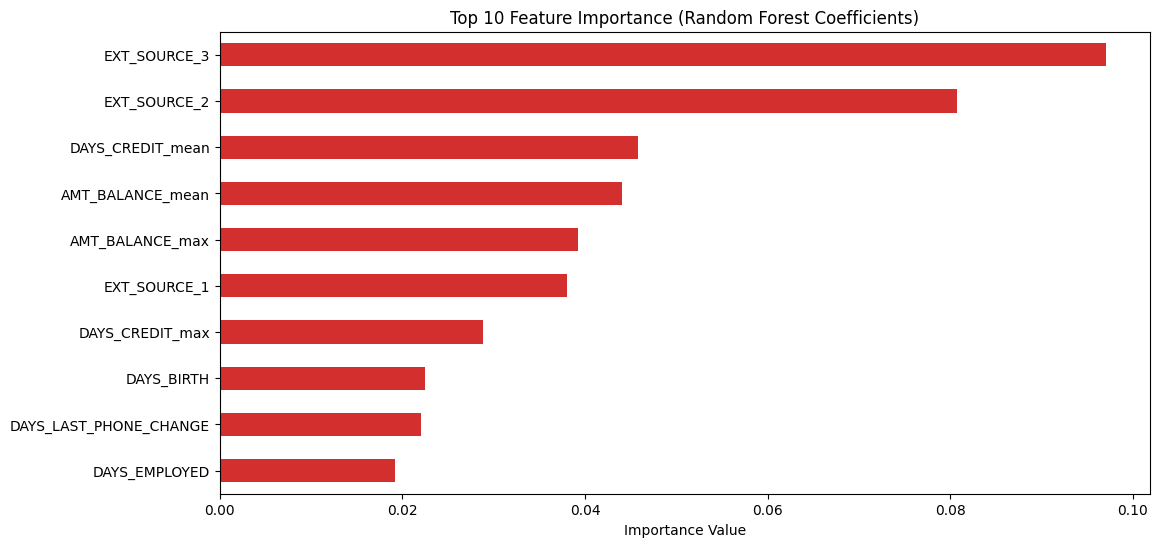

In [18]:
def plot_feature_importance(model, feature_names, top_n=10):
    if hasattr(model, 'feature_importances_'):  # Random Forest, XGBoost, LightGBM
        importances = model.feature_importances_
        title = f'Top {top_n} Feature Importance (Random Forest Coefficients)'
    else:
        raise ValueError("Model does not have feature_importances_ attribute")

    feature_importance = pd.Series(importances, index=feature_names)
    top_features = feature_importance.abs().sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    top_features.sort_values().plot(kind='barh', color='#D32F2F')  # Warna merah tua
    plt.title(title)
    plt.xlabel('Importance Value')
    plt.show()

# Plot untuk Random Forest
plot_feature_importance(models['Random Forest'], X_train.columns, top_n=10)

## **Feature Importance Overview**  

Feature Importance is a method used to determine which features have the most significant influence on the model's predictions. In this analysis, the **Random Forest** model assigns weights to each feature based on how much it contributes to the prediction outcomes.  

---  

## **Interpretation of Feature Importance**  

Based on the analysis, here are the **10 most important features** in the model along with their interpretations:  

1. **EXT_SOURCE_3 (0.0970) & EXT_SOURCE_2 (0.0807)**  
   - These features come from external sources that provide additional information about the customer's credit risk.  
   - Higher values generally indicate lower credit risk, making customers more likely to have a good credit history.  
   - The dominance of these features suggests that external sources are highly useful in assessing creditworthiness.  

2. **DAYS_CREDIT_mean (0.0458) & DAYS_CREDIT_max (0.0288)**  
   - **DAYS_CREDIT_mean** represents the **average number of days since the customer last applied for credit**, while **DAYS_CREDIT_max** shows the maximum value of these days.  
   - This information helps analyze customers' borrowing behavior, where frequent credit applications may indicate a higher reliance on loans.  

3. **AMT_BALANCE_mean (0.0440) & AMT_BALANCE_max (0.0392)**  
   - Measures the **average and maximum account balance** of customers.  
   - A higher balance typically indicates better financial stability, reducing the likelihood of credit default.  

4. **EXT_SOURCE_1 (0.0380)**  
   - Similar to **EXT_SOURCE_2** and **EXT_SOURCE_3**, this feature is derived from an external source that helps assess customers' credit risk.  
   - The dominance of external features in this list indicates that third-party data is highly relevant in evaluating creditworthiness.  

5. **DAYS_BIRTH (0.0224)**  
   - Represents the customer's age in days.  
   - Older customers are often associated with greater financial stability, making this factor useful in assessing credit risk.  

6. **DAYS_LAST_PHONE_CHANGE (0.0219)**  
   - Measures the number of days since the customer last changed their phone number.  
   - Frequent phone number changes may indicate financial or social instability, which can increase credit risk.  

7. **DAYS_EMPLOYED (0.0191)**  
   - Represents the number of days since the customer started working.  
   - Longer employment duration indicates greater financial stability, increasing the likelihood of credit repayment.  

---  

## **Conclusion**  

- **External sources (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3)** are the **most dominant factors**, indicating that third-party data plays a crucial role in assessing customer credit risk.  
- **Credit-related features (DAYS_CREDIT_mean, DAYS_CREDIT_max) and account balance (AMT_BALANCE_mean, AMT_BALANCE_max)** significantly contribute to understanding customers' financial patterns.  
- **Demographic factors such as age (DAYS_BIRTH) and employment duration (DAYS_EMPLOYED)** play an essential role in evaluating financial stability.  
- **Contact stability (DAYS_LAST_PHONE_CHANGE)** serves as an additional factor, highlighting that frequent phone number changes may indicate higher credit risk.
---

# **4. Business Recommendation**
1. **Stricter Customer Screening and Risk Prediction**
   - **Explanation:** The company should be more cautious in screening customers by checking their credit history, expenses, and employment status. Additionally, predict which customers are at risk of default based on this data.

2. **Personalized Loan Products Based on Customer Ability to Pay**
   - **Explanation:** The company should offer various types of loans that match the customer’s financial condition. For example, for customers with stable but low income, offer loans with low interest and long terms. For customers with high but unstable income, offer loans with stricter terms.

3. **Financial Education and Support for Customers Facing Payment Issues**
   - **Explanation:** Provide financial education to help customers manage their finances better. Additionally, for customers facing difficulty in paying loans, offer restructuring programs or payment relief.

4. **Utilizing External Data and Security to Assess Risk and Improve Customer Experience**
   - **Explanation:** The company can use external data, such as information from credit agencies or online transaction data, to assess the customer’s financial condition more comprehensively. Also, ensure smooth verification and transaction security processes to avoid errors or fraud.